In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import matplotlib.pyplot as plt

import sys
sys.path.append('.')

In [ ]:
STARR_DS = 'A549.RU486'
PROJECT_ROOT = Path('/hpc/group/igvf')
DB_ROOT = PROJECT_ROOT / 'db'
DATA_ROOT = Path(f'../igvf-pm/alex_b/starrseq_A549_extra_GCs')
STARR_DB = DB_ROOT / f"{STARR_DS}db"

datafile = f"{STARR_DS}.combined.input_and_output.w300s50.log2FC.gt_200.sequence.final.txt.gz"

In [3]:
df = pd.read_csv(DATA_ROOT / datafile, compression="gzip", delimiter="\t")

In [13]:
df.columns

Index(['chrom', 'start', 'end', 'input_rep1', 'input_rep2', 'input_rep3',
       'input_rep4', 'input_rep5', 'A549_RU486_rep2', 'A549_RU486_rep3',
       'A549_RU486_rep4', 'A549_RU486_rep5', 'RU486_log2FC', 'sequence'],
      dtype='object')

In [10]:
df.filter(regex='^(input|A549).*rep').sum(axis=0)

input_rep1         5.478512e+09
input_rep2         5.103763e+09
input_rep3         5.180273e+09
input_rep4         5.965270e+09
input_rep5         4.966557e+09
A549_RU486_rep2    1.080381e+09
A549_RU486_rep3    7.097660e+08
A549_RU486_rep4    7.084416e+08
A549_RU486_rep5    1.145696e+09
dtype: float64

In [13]:
from starrutil.starrnorm import normalize_by_lib, mean_fc

In [14]:
df_norm = normalize_by_lib(df, rna_prefix='A549')

In [19]:
df_log2fc = np.log2(mean_fc(df, rna_prefix='A549'))
df_norm_log2fc = np.log2(mean_fc(df_norm, rna_prefix='A549'))

In [ ]:
import matplotlib.pyplot as plt

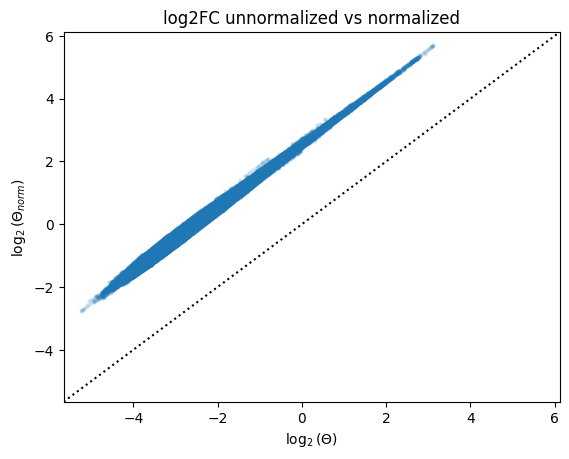

In [32]:
fig, ax = plt.subplots()
ax.scatter(df_log2fc, df_norm_log2fc, marker=".", alpha=0.2, linewidths=0)
ax.set_xlabel("$\log_2(\Theta)$")
ax.set_ylabel("$\log_2(\Theta_{norm})$")
ax.set_title("log2FC unnormalized vs normalized")
ax.set_xlim(ax.get_xlim()[0], ax.get_ylim()[1])
ax.set_ylim(ax.get_xlim()[0], ax.get_ylim()[1])
ax.plot(ax.get_xlim(), ax.get_xlim(), color='black', linestyle='dotted')

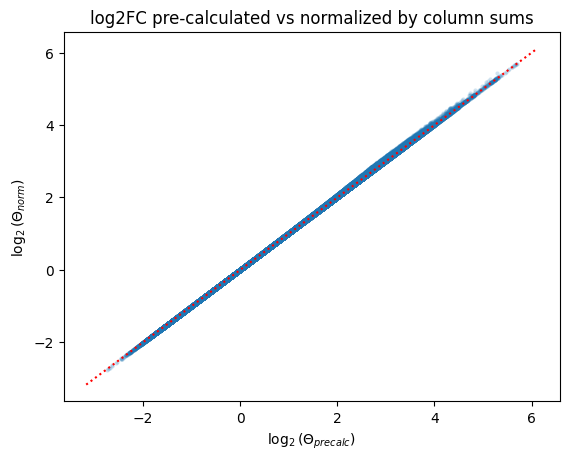

In [39]:
fig, ax = plt.subplots()
ax.scatter(df['RU486_log2FC'], df_norm_log2fc, marker=".", alpha=0.2, linewidths=0)
ax.set_xlabel("$\log_2(\Theta_{precalc})$")
ax.set_ylabel("$\log_2(\Theta_{norm})$")
ax.set_title("log2FC pre-calculated vs normalized by column sums")
ax.plot(ax.get_xlim(), ax.get_xlim(), color='r', linestyle='dotted')